In [ ]:
using Plots
using Distributions

In [ ]:
include("RelativeAbundance.jl")
intermidiate = RelativeAbundance.init(10)
print(" ")

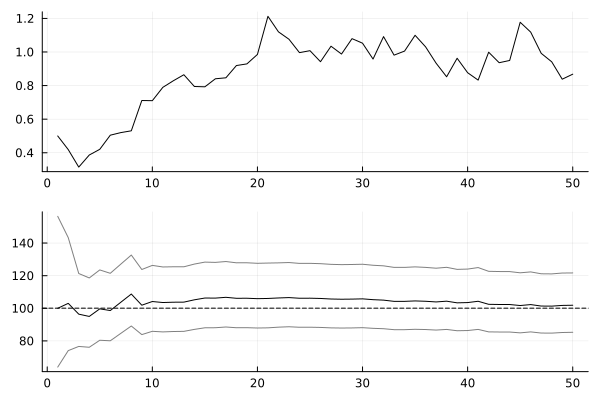

In [5]:
s = ([log(0.5)],[log(100)], [0.2;;] )
T= 50
Ht = vcat(repeat([15.0], 2), repeat([2.0],50))
x = [log(0.5), log(100)]
accx = zeros(T)
accs = zeros(T)
accsd = zeros(T)
for i in 1:T
    accx[i] = x[1]
    accs[i] = s[2][1]
    accsd[i] = sqrt(s[3][1,1])
    x, s = RelativeAbundance.state_transition_sim!(intermidiate,x,s,Ht[i],RelativeAbundance.pars)
    
end
p1 = Plots.plot(exp.(accx),color="black", legend = false)
p2 = Plots.plot(exp.(accs), color = "black")
Plots.plot!(exp.(accs.-accsd), color = "grey")
Plots.plot!(exp.(accs .+ accsd), color = "grey")
Plots.hline!([exp(x[2])], color = "black", linestyle = :dash, legend = false)
plot(p1,p2,layout=(2,1))

In [78]:
sqrt(exp(0.23)-1)

0.5085272951666192

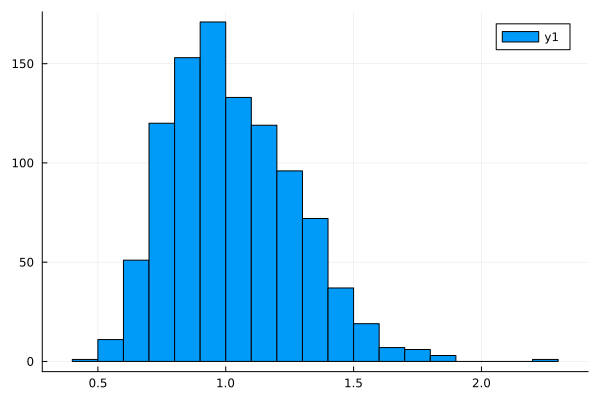

In [79]:
using Distributions
Plots.histogram(exp.(rand(Distributions.Normal(0,0.23),1000)))

In [15]:
include("RelativeAbundance.jl")
pars = (1.36,-0.22, 0.9, [0.025 0.0; 0.0 0.0000001], 0.0, 0.00, 0.0,25.0)
V = RelativeAbundance.init_V(log(3.0),log(0.01),log(300),log(10),0.7,20)
Tr = RelativeAbundance.init_Transitions(collect(0.0:2.5:100),V;mQuad=20)
RelativeAbundance.computeRewards!(Tr,pars)
RelativeAbundance.compute_Transitions!(Tr,pars)

progress = 5.0%
progress = 10.0%


progress = 15.0%
progress = 20.0%
progress = 25.0%
progress = 30.0%
progress = 35.0%
progress = 40.0%
progress = 45.0%
progress = 50.0%
progress = 55.0%
progress = 60.0%
progress = 65.0%
progress = 70.0%
progress = 75.0%
progress = 80.0%
progress = 85.0%
progress = 90.0%
progress = 95.0%
progress = 100.0%


┌ Info:  started timer at: 2022-11-16T13:23:28.002
└ @ TickTock /Users/johnbuckner/.julia/packages/TickTock/fGILW/src/TickTock.jl:54


progress = 5.0%  time: 2.0
progress = 10.0%  time: 3.0
progress = 15.0%  time: 5.0
progress = 20.0%  time: 7.0
progress = 25.0%  time: 11.0
progress = 30.0%  time: 11.0
progress = 35.0%  time: 12.0
progress = 40.0%  time: 12.0
progress = 45.0%  time: 12.0
progress = 50.0%  time: 13.0
progress = 55.0%  time: 13.0
progress = 60.0%  time: 14.0
progress = 65.0%  time: 22.0
progress = 70.0%  time: 22.0
progress = 75.0%  time: 23.0
progress = 80.0%  time: 23.0
progress = 85.0%  time: 24.0
progress = 90.0%  time: 24.0
progress = 95.0%  time: 25.0
progress = 100.0%  time: 25.0


In [16]:
discount = 0.05
RelativeAbundance.solve_parallel(Tr,V,1/(1+discount))

interation: 1  convergence: 80000
interation: 2  convergence: 1.3606763106681151e7
interation: 3  convergence: 4.342363441031014e6
interation: 4  convergence: 1.5044591700798057e6
interation: 5  convergence: 616977.3877981666
interation: 6  convergence: 297818.48135450674
interation: 7  convergence: 162776.48556481837
interation: 8  convergence: 107714.22787382908
interation: 9  convergence: 89122.37909978107
interation: 10  convergence: 81761.88420070578
interation: 11  convergence: 76851.27215243169
interation: 12  convergence: 71699.95534187007
interation: 13  convergence: 66794.59579778605
interation: 14  convergence: 62058.04732200317
interation: 15  convergence: 57454.93543514801
interation: 16  convergence: 53005.30215287679
interation: 17  convergence: 48983.78184482745
interation: 18  convergence: 45114.71952965735
interation: 19  convergence: 41512.30958820946
interation: 20  convergence: 38232.82305801966
interation: 21  convergence: 35103.28475660578
interation: 22  converg

([-4.462575624121686], [5.108572932865323], [0.6825;;])
165.434100770427
([-4.462575624121686], [5.108572932865323], [0.4725;;])
([-4.462575624121686], [5.108572932865323], [0.26249999999999996;;])
([-4.462575624121686], [5.108572932865323], [0.0525;;])
([-4.462575624121686], [5.108572932865323], [0.0525;;])


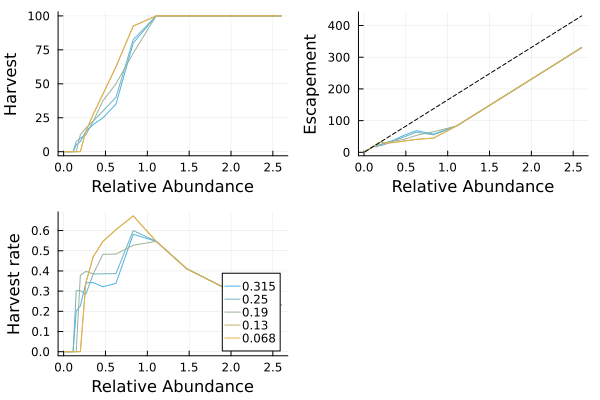

In [17]:
using Plots
using Colors
num = 16
m = 20
ind = m*19 + num
println(Tr.nodes[ind*m+1])
println(exp.(Tr.nodes[ind*m+1][2][1]))
x1 = broadcast(i -> Tr.nodes[i][1][1], (ind*m+1):(ind*m+m))
x12 = broadcast(i -> Tr.nodes[i][2][1], (ind*m+1):(ind*m+m))
H1 = broadcast(x -> RelativeAbundance.policy!(zeros(3),x,Tr,V,1/(1+discount)), (ind*m+1):(ind*m+m))
ind = m*13+ num
println(Tr.nodes[ind*m+1])
x2 = broadcast(i -> Tr.nodes[i][1][1], (ind*m+1):(ind*m+m))
x22 = broadcast(i -> Tr.nodes[i][2][1], (ind*m+1):(ind*m+m))
H2 = broadcast(x -> RelativeAbundance.policy!(zeros(3),x,Tr,V,1/(1+discount)), (ind*m+1):(ind*m+m))
ind = m*7 + num
println(Tr.nodes[ind*m+1])
x3 = broadcast(i -> Tr.nodes[i][1][1], (ind*m+1):(ind*m+m))
x32 = broadcast(i -> Tr.nodes[i][2][1], (ind*m+1):(ind*m+m))
H3 = broadcast(x -> RelativeAbundance.policy!(zeros(3),x,Tr,V,1/(1+discount)), (ind*m+1):(ind*m+m))
ind = m*1 + num
println(Tr.nodes[ind*m+1])
x4 = broadcast(i -> Tr.nodes[i][1][1], (ind*m+1):(ind*m+m))
x42 = broadcast(i -> Tr.nodes[i][2][1], (ind*m+1):(ind*m+m))
H4 = broadcast(x -> RelativeAbundance.policy!(zeros(3),x,Tr,V,1/(1+discount)), (ind*m+1):(ind*m+m))
ind = m*1 + num
println(Tr.nodes[ind*m+1])
x5 = broadcast(i -> Tr.nodes[i][1][1], (ind*m+1):(ind*m+m))
x52 = broadcast(i -> Tr.nodes[i][2][1], (ind*m+1):(ind*m+m))
H5 = broadcast(x -> RelativeAbundance.policy!(zeros(3),x,Tr,V,1/(1+discount)), (ind*m+1):(ind*m+m))


p1 = Plots.plot(exp.(x1),H1, label = false,c = Colors.RGB(0.3,0.7,0.9))
Plots.plot!(exp.(x2),H2, label = false,c = Colors.RGB(0.45,0.7,0.75))
Plots.plot!(exp.(x3),H3, label = false,c = Colors.RGB(0.6,0.7,0.6))
Plots.plot!(exp.(x4),H4, label = false,c = Colors.RGB(0.75,0.7,0.45))
Plots.plot!(exp.(x5),H5, label = false,
    xlabel = "Relative Abundance",c = Colors.RGB(0.9,0.7,0.3), ylabel = "Harvest")

p2 = Plots.plot(exp.(x1),exp.(x1+x12).-H1, label = false,c = Colors.RGB(0.3,0.7,0.9))
Plots.plot!(exp.(x2),exp.(x2+x22).-H2, label = false,c = Colors.RGB(0.45,0.7,0.75))
Plots.plot!(exp.(x3),exp.(x3+x32).-H3, label = false,c = Colors.RGB(0.6,0.7,0.6))
Plots.plot!(exp.(x4),exp.(x4+x42).-H4, label = false,c = Colors.RGB(0.75,0.7,0.45))
Plots.plot!(exp.(x5),exp.(x5+x52).-H5, label = false, 
    xlabel = "Relative Abundance",c = Colors.RGB(0.9,0.7,0.3), ylabel = "Escapement")
Plots.plot!(exp.(x5),exp.(x5+x52), label = false, color = "black", linestyle = :dash)

p3 = Plots.plot(exp.(x1),H1./exp.(x1+x12), c = Colors.RGB(0.3,0.7,0.9), label = "0.315")
Plots.plot!(exp.(x2),H2./exp.(x2+x22),c = Colors.RGB(0.45,0.7,0.75), label = "0.25")
Plots.plot!(exp.(x3),H3./exp.(x3+x32),c = Colors.RGB(0.6,0.7,0.6), label = "0.19")
Plots.plot!(exp.(x4),H4./exp.(x4+x42),c = Colors.RGB(0.75,0.7,0.45), label = "0.13")
Plots.plot!(exp.(x5),H5./exp.(x5+x52), legend = :bottomright,
    xlabel = "Relative Abundance",c = Colors.RGB(0.9,0.7,0.3), label = "0.068", ylabel = "Harvest rate")

plot(p1,p2,p3)

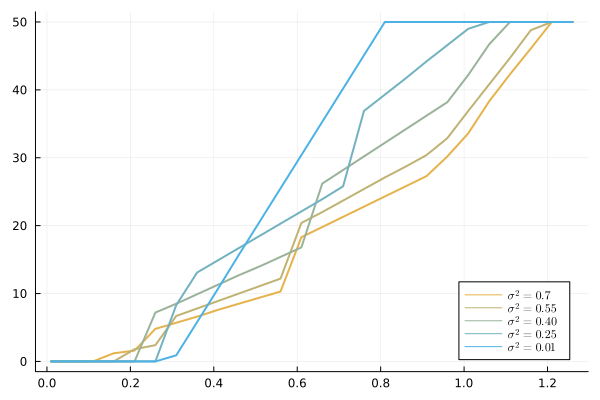

In [18]:
using LaTeXStrings
include("../src/MvGaussHermite.jl")
include("RelativeAbundance.jl")
int = RelativeAbundance.init(15)
quad = MvGaussHermite.init_mutable(15,[0.0],[1.0;;])


actions = 0.0:0.1:50#Tr.actions
delta = 1/(1+discount)
z = zeros(3)

x = 0.01:0.05:1.26
Plots.plot(x,
            broadcast(x -> RelativeAbundance.policy!(z,int,quad,([x],[log(100)-0.15], [0.7;;]),actions,V,delta,pars),
                        log.(x)), label =  L"\sigma^2 = 0.7",c = Colors.RGB(0.9,0.7,0.3), width = 2)

Plots.plot!(x,
            broadcast(x -> RelativeAbundance.policy!(z,int,quad,([x],[log(100)-0.15], [0.55;;]),actions,V,delta,pars),
                        log.(x)), label =  L"\sigma^2 = 0.55",c = Colors.RGB(0.75,0.7,0.45), width = 2)

Plots.plot!(x,
            broadcast(x -> RelativeAbundance.policy!(z,int,quad,([x],[log(100)-0.1], [0.40;;]),actions,V,delta,pars),
                        log.(x)), label =  L"\sigma^2 = 0.40",c = Colors.RGB(0.6,0.7,0.6), width = 2)

Plots.plot!(x,
            broadcast(x -> RelativeAbundance.policy!(z,int,quad,([x],[log(100)-0.05], [0.25;;]),actions,V,delta,pars),
                        log.(x)), label =  L"\sigma^2 = 0.25",c = Colors.RGB(0.45,0.7,0.75), width = 2)

Plots.plot!(x,
            broadcast(x -> RelativeAbundance.policy!(z,int,quad,([x],[log(100)-0.005], [0.01;;]),actions,V,delta,pars),
                        log.(x)), label = L"\sigma^2 = 0.01",c = Colors.RGB(0.3,0.7,0.9), width = 2, legend = :bottomright)

# Run simulaiton 

In [240]:



T = 100

s = ([log(0.5)], [log(100)], [0.7;;])
x = [s[1][1], log(200)]

xls = []
sls = []
Hls = []
for i in 1:T
    
    Ht=RelativeAbundance.policy!(z,int,quad,s,actions,V,delta,pars)
    push!(xls,x)
    push!(sls,s)
    push!(Hls,Ht)
    x,s=RelativeAbundance.state_transition_sim!(int,x,s,Ht,pars)
    
end 


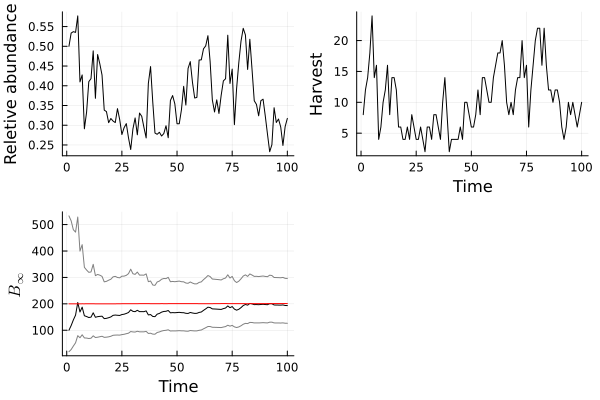

In [241]:
using LaTeXStrings
p1=Plots.plot(exp.(broadcast(i->xls[i][1], 1:T)), color = "black", ylabel = "Reletive abundance", legend = false)
p2=Plots.plot(Hls, color = "black", ylabel = "Harvest", xlabel = "Time", legend = false)
p3=Plots.plot(exp.(broadcast(i->sls[i][2][1], 1:T)), color = "black",  ylabel = L"B_{\infty}", xlabel = "Time")
Plots.plot!(exp.(broadcast(i->xls[i][2], 1:T)), color = "red")
Plots.plot!(exp.(broadcast(i->sls[i][2][1] + 2.0*sqrt(sls[i][3][1,1]), 1:T)), color = "grey")
Plots.plot!(exp.(broadcast(i->sls[i][2][1] - 2.0*sqrt(sls[i][3][1,1]), 1:T)), color = "grey", legend = false)

plot(p1,p2,p3)